## Load train and test data

In [18]:
from proj1_helpers import *
from data_helpers import *
from cross_validation import cross_validation
from implementations import ridge_regression
from costs import compute_mse
from plots import plot_cross_validation

### Load train and test data

In [19]:
# Data paths
DATA_TRAIN_PATH = 'data/train.csv'
DATA_TEST_PATH = 'data/test.csv'

# Load data
y_train, x_train, id_train = load_csv_data(DATA_TRAIN_PATH)
y_test, x_test, id_test = load_csv_data(DATA_TEST_PATH)

### Get index for the three different jet groups

In [20]:
jet_train_index = get_jet_index(x_train)
jet_test_index = get_jet_index(x_test)

### Define parameters

In [33]:
degrees = range(1,16)
lambdas = np.logspace(-5, -1, 20)
k_fold = 4
seed = 6
degrees, lambdas

(range(1, 16),
 array([1.00000000e-05, 1.62377674e-05, 2.63665090e-05, 4.28133240e-05,
        6.95192796e-05, 1.12883789e-04, 1.83298071e-04, 2.97635144e-04,
        4.83293024e-04, 7.84759970e-04, 1.27427499e-03, 2.06913808e-03,
        3.35981829e-03, 5.45559478e-03, 8.85866790e-03, 1.43844989e-02,
        2.33572147e-02, 3.79269019e-02, 6.15848211e-02, 1.00000000e-01]))

## Group 0

(99913, 18) (227458, 18)


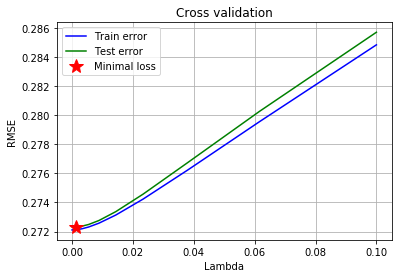

 Degree=1 Best value of lambda = 0.0012742749857031334 
 Train loss = 0.2721145143641901 Test loss = 0.2723322169978488 
 Train accuracy = 81.68388181599808 Test accuracy = 81.67387300824726


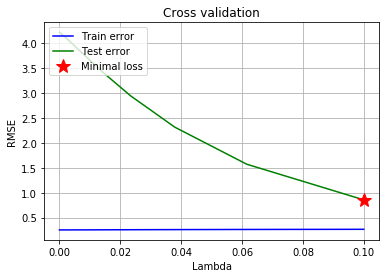

 Degree=2 Best value of lambda = 0.1 
 Train loss = 0.25234440585394835 Test loss = 0.8559192379683298 
 Train accuracy = 82.61636907144954 Test accuracy = 82.5706621827208


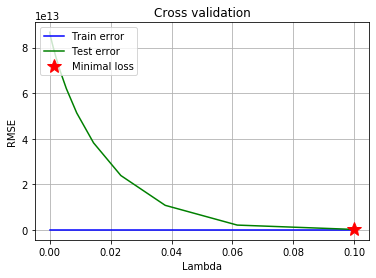

 Degree=3 Best value of lambda = 0.1 
 Train loss = 0.2386563326454116 Test loss = 212253862272.07886 
 Train accuracy = 83.63159580430779 Test accuracy = 83.60957642725599


LinAlgError: Singular matrix

In [34]:
# get train and test data
train_index = jet_train_index[0]
test_index = jet_test_index[0]
x_tr, y_tr = x_train[train_index], y_train[train_index]
x_te, y_te = x_test[test_index], y_test[test_index]
# preprocess data
x_tr = preprocessing(x_tr)
x_te = preprocessing(x_te)
print(x_tr.shape, x_te.shape)
# build model
y_tr, x_tr = build_model_data(x_tr, y_tr)
y_te, x_te = build_model_data(x_te, y_te)
    
    
Lambdas_star = []
Accuracy = []

for id_degree, degree in enumerate(degrees):
    x_tr = build_poly_all_features(x_tr, degree)
                                                      
    # prepare storage of the mean of the rmse for train and test data
    rmse_train = []
    rmse_test = []
    accuracy_train = []
    accuracy_test = []
    
    for id_lambda, lambda_ in enumerate(lambdas):
        # prepare storage of the rmse for train and test data for each fold
        rmse_tr = []
        rmse_te = []
        accuracy_tr = []
        accuracy_te = []
        # cross-validation
        for i,k in enumerate(range(k_fold)):
            x, y, x_val, y_val = cross_validation(y_tr, x_tr, k, k_fold, seed)
            #ridge regression
            w,_ = ridge_regression(y, x, lambda_)
            # store weights and rmse for train and test data for each fold
            rmse_tr.append(compute_mse(y, x, w))
            rmse_te.append(compute_mse(y_val, x_val, w))
            accuracy_tr.append(predict_accuracy(y,x,w))
            accuracy_te.append(predict_accuracy(y_val,x_val,w)) 
        # store the mean of the weights and rmse for train and test data
        rmse_train.append(np.mean(rmse_tr))
        rmse_test.append(np.mean(rmse_te))
        accuracy_train.append(np.mean(accuracy_tr))
        accuracy_test.append(np.mean(accuracy_te))
            
    loss_train = np.amin(rmse_train)    
    loss_test = np.amin(rmse_test)
    training_accuracy = np.amax(accuracy_train)
    test_accuracy = np.amax(accuracy_test)
    lambda_star = lambdas[np.argmin(rmse_test)]

    plot_cross_validation(lambdas, "Lambda", lambda_star, rmse_train, rmse_test, loss_test)
    print(" Degree={d} Best value of lambda = {g} \n Train loss = {l_tr} Test loss = {l_te} \n Train accuracy = {tr_ac} Test accuracy = {te_ac}".format(
        d=degree, g=lambda_star, l_tr=loss_train, l_te=loss_test, tr_ac=training_accuracy, te_ac=test_accuracy))
    
    Lambdas_star.append(lambda_star)
    Accuracy.append(test_accuracy)

In [ ]:
plt.plot(degrees, Accuracy, color='g')
plt.xlabel("Degree")
plt.ylabel("Accuracy")
plt.title("Accuracy in function of the degree")
plt.grid(True)
plt.show()

degree_star =  np.argmax(Accuracy) + 1
Accuracy_star = np.amax(Accuracy)
Lambda_star = Lambdas_star[np.argmax(Accuracy)]

TX_train = build_poly_all_features(tx, degree_star)
Weights_star,_ = ridge_regression(y, tx, Lambda_star)
print("Best degree={d} Best value of lambda = {g} \n Accuracy = {ac} \n Weights = {we}".format(
        d=degree_star, g=Lambda_star, ac=Accuracy_star, we = Weights_star))

## Group 1

## Group 2